In [100]:
from conjugate_gradient import ConjugateGradient

import theano.tensor as T
import numpy as np

from pymanopt import Problem 
from pymanopt.manifolds import Stiefel

import time

import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(1)
X = T.matrix()

In [3]:
# fix p
p = 3
def dependence_n(n):
    A = np.random.randn(n, n)
    A = 0.5 * (A + A.T)
    cost = T.dot(X.T, T.dot(A, X)).trace()
    
    # specify the manifold
    St = Stiefel(n, p)
    # define the problem
    problem = Problem(manifold=St, cost=cost, arg=X, verbosity=0)
    # pick a solver
    solver = ConjugateGradient(maxiter=1000, mingradnorm=1e-6)
    # solve
    t = time.time()
    Xopt = solver.solve(problem)
    t = time.time() - t
    return t

In [4]:
times_n = []
for n in np.logspace(1, 4, 40):
    times_n.append(dependence_n(int(n)))  

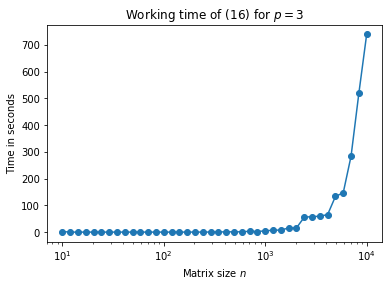

In [26]:
plt.plot(np.logspace(1, 4, 40), times_n, '-o')
plt.xscale('log')
plt.xlabel(r'Matrix size $n$')
plt.ylabel('Time in seconds')
plt.title(r'Working time of $(16)$ for $p=3$')
plt.savefig('size_dependence.png', dvi=1200)

In [111]:
np.savetxt('times_n.txt', times_n)

In [6]:
#fix n and matrix A
n = 1000

A = np.random.randn(n, n)
A = 0.5 * (A + A.T)
cost = T.dot(X.T, T.dot(A, X)).trace()

def dependence_p (p):
    St = Stiefel(n, p)
    # define the problem
    problem = Problem(manifold=St, cost=cost, arg=X, verbosity=0)
    # pick a solver
    solver = ConjugateGradient(maxiter=1000, mingradnorm=1e-6)
    # solve
    t = time.time()
    Xopt = solver.solve(problem)
    t = time.time() - t
    return t

In [7]:
times_p = []
for p in np.linspace(3, 200, 20):
    times_p.append(dependence_p(int(p)))

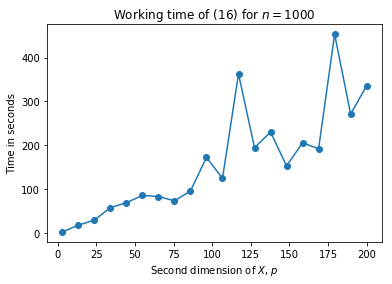

In [24]:
plt.plot(np.linspace(3, 200, 20), times_p, '-o')
plt.xlabel(r'Second dimension of $X$, $p$')
plt.ylabel('Time in seconds')
plt.title(r'Working time of $(16)$ for $n=1000$')
plt.savefig('dim_dependence.png', dvi=1200)

In [110]:
np.savetxt('times_p.txt', times_p)

In [66]:
n, p = 10, 3

---

In [73]:
A = np.random.randn(n, n)
A = 0.5 * (A + A.T)

In [74]:
cost = 0.5 * T.dot(X.T, T.dot(A, X)).trace()

In [75]:
St = Stiefel(n, p)

problem = Problem(manifold=St, cost=cost, arg=X, verbosity=0)
solver = ConjugateGradient(maxiter=1000, mingradnorm=1e-6)
Xopt = solver.solve(problem)

In [76]:
true_val = 0.5 * sum(sorted(np.linalg.eig(A)[0])[:p])

In [106]:
np.savetxt('cost.txt', solver._cost)

In [109]:
np.savetxt('gradnorm.txt', solver._gradnorm)

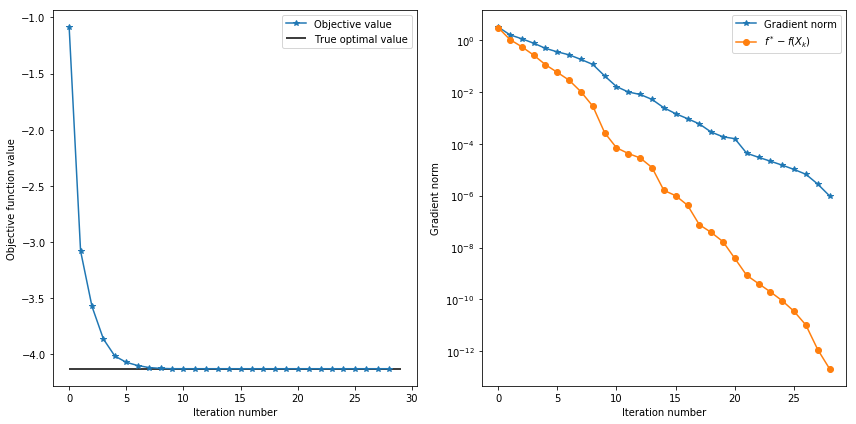

In [107]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(solver._cost, '-*', label="Objective value")
plt.hlines(y=true_val, xmin=0, xmax=solver.iters + 1, label="True optimal value")
plt.xlabel("Iteration number")
plt.ylabel("Objective function value")
plt.legend(loc='best')
plt.subplot(1, 2, 2)
plt.plot(solver._gradnorm, '-*', label="Gradient norm")
plt.plot(solver._cost - true_val, '-o', label=r'$f^* - f(X_k)$')
plt.xlabel("Iteration number")
plt.ylabel("Gradient norm")
plt.yscale('log')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('optimality.eps', format='eps', dpi=1000)